In [1]:
import pandas as pd

# Load the dataset to inspect it
file_path = '../../data/processed/Imputed_Final_Merged_Canada_Dataset.csv'
df = pd.read_csv(file_path)

# Display the first few rows and the summary information of the dataset
df_info = df.info()
df_head = df.head()

df_info, df_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        233 non-null    object 
 1   Composite_HPI_SA            233 non-null    float64
 2   Single_Family_HPI_SA        233 non-null    float64
 3   One_Storey_HPI_SA           233 non-null    float64
 4   Two_Storey_HPI_SA           233 non-null    float64
 5   Townhouse_HPI_SA            233 non-null    float64
 6   Apartment_HPI_SA            233 non-null    float64
 7   Composite_Benchmark_SA      233 non-null    int64  
 8   Single_Family_Benchmark_SA  233 non-null    int64  
 9   One_Storey_Benchmark_SA     233 non-null    int64  
 10  Two_Storey_Benchmark_SA     233 non-null    int64  
 11  Townhouse_Benchmark_SA      233 non-null    int64  
 12  Apartment_Benchmark_SA      233 non-null    int64  
 13  Interest Rate               233 non

(None,
       Date  Composite_HPI_SA  Single_Family_HPI_SA  One_Storey_HPI_SA  \
 0  2005-01             100.0                 100.0              100.0   
 1  2005-02             100.3                 100.2              100.3   
 2  2005-03             100.6                 100.6              100.7   
 3  2005-04             100.9                 100.8              101.2   
 4  2005-05             101.2                 101.1              101.4   
 
    Two_Storey_HPI_SA  Townhouse_HPI_SA  Apartment_HPI_SA  \
 0              100.0             100.0             100.0   
 1              100.1             100.3             100.6   
 2              100.5             100.6             101.1   
 3              100.6             100.8             101.5   
 4              100.8             101.0             102.0   
 
    Composite_Benchmark_SA  Single_Family_Benchmark_SA  \
 0                  239800                      260400   
 1                  240500                      261000   
 2   

The dataset has 21 columns and 233 entries, with various housing price indices, benchmarks, economic indicators, and other relevant data. Some of the key columns include:

- Housing Price Indices (e.g., Composite_HPI_SA, Single_Family_HPI_SA, etc.)
- Benchmark Prices (e.g., Composite_Benchmark_SA, Single_Family_Benchmark_SA, etc.)
- Economic Indicators (e.g., Interest Rate, Unemployment Rate, All-items CPI, All industries GDP, etc.)

#### Data Preporcessing

In [2]:
# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m')

# Convert 'All industries GDP' to a numeric value (removing commas and converting to float)
df['All industries GDP'] = df['All industries GDP'].replace({',': ''}, regex=True).astype(float)

# Handle missing values: Fill missing values with the mean of the respective column
df.fillna(df.mean(), inplace=True)

# Drop any rows with remaining missing values (if any)
df.dropna(inplace=True)

# Normalize or standardize the data (excluding the 'Date' column)
from sklearn.preprocessing import StandardScaler

# Selecting columns to normalize (excluding the Date column)
columns_to_normalize = df.columns.difference(['Date'])

# Applying standardization
scaler = StandardScaler()
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# Show the first few rows of the preprocessed data
df.head()


,Date,Composite_HPI_SA,Single_Family_HPI_SA,One_Storey_HPI_SA,Two_Storey_HPI_SA,Townhouse_HPI_SA,Apartment_HPI_SA,Composite_Benchmark_SA,Single_Family_Benchmark_SA,One_Storey_Benchmark_SA,...,Townhouse_Benchmark_SA,Apartment_Benchmark_SA,Interest Rate,Unemployment Rate,Immigration Num,All-items CPI,All industries GDP,Active businesses,Opening businesses,Closing businesses
0,2005-01-01,-1.373590,-1.358785,-1.375577,-1.340213,-1.297913,-1.392467,-1.373695,-1.358767,-1.375652,...,-1.297862,-1.392504,0.515527,0.006470,-0.711205,-1.544567,-1.576738,-0.560812,-0.074252,-0.450314
1,2005-02-01,-1.369040,-1.355832,-1.370776,-1.338765,-1.293914,-1.383342,-1.369267,-1.355364,-1.370258,...,-1.293896,-1.383663,0.515527,0.085816,-0.711205,-1.516388,-1.570645,-0.560812,-0.074252,-0.450314
2,2005-03-01,-1.364489,-1.349924,-1.364375,-1.332975,-1.289915,-1.375738,-1.364206,-1.350260,-1.364095,...,-1.289931,-1.375705,0.508889,0.006470,-0.711205,-1.474118,-1.599136,-0.560812,-0.074252,-0.450314
3,2005-04-01,-1.359938,-1.346971,-1.356374,-1.331527,-1.287249,-1.369655,-1.359778,-1.346290,-1.357160,...,-1.287287,-1.369516,0.508889,-0.152221,-0.711205,-1.452983,-1.536691,-0.560812,-0.074252,-0.450314
4,2005-05-01,-1.355387,-1.342541,-1.353173,-1.328632,-1.284583,-1.362051,-1.355982,-1.342887,-1.353308,...,-1.284643,-1.362443,0.508889,0.085816,-0.711205,-1.445938,-1.500294,-0.560812,-0.074252,-0.450314


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Predicting 'Single_Family_Benchmark_SA' and 'Townhouse_Benchmark_SA'

# Function to build and evaluate a linear regression model for a given target variable
def build_and_evaluate_model(target_variable):
    X = df.drop(columns=[target_variable, 'Date'])
    y = df[target_variable]

    # Splitting the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Building the Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Making predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluating the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return mse, r2

# Evaluating models for 'Single_Family_Benchmark_SA' and 'Townhouse_Benchmark_SA'
mse_single_family, r2_single_family = build_and_evaluate_model('Single_Family_Benchmark_SA')
mse_townhouse, r2_townhouse = build_and_evaluate_model('Townhouse_Benchmark_SA')

mse_single_family, r2_single_family, mse_townhouse, r2_townhouse


(1.4872361668947266e-07,
 0.9999998622414399,
 1.3711819650387615e-07,
 0.9999998712210623)

The linear regression models for predicting Single_Family_Benchmark_SA and Townhouse_Benchmark_SA have been built and evaluated. Here are the results:

**Single_Family_Benchmark_SA:**

- **Mean Squared Error (MSE):** 1.49 × 10−7
- **R-squared (R²):** 0.999999862 (Indicating that the model explains almost all the variance in the target variable.)

**Townhouse_Benchmark_SA:**

- **Mean Squared Error (MSE):** 1.37 × 10−7 

- **R-squared (R²):** 0.999999871 (Similarly, this value is very close to 1, indicating excellent model performance.)

These results show that the linear regression models are highly accurate for predicting these benchmarks. If you need further analysis or wish to try different models, feel free to ask!

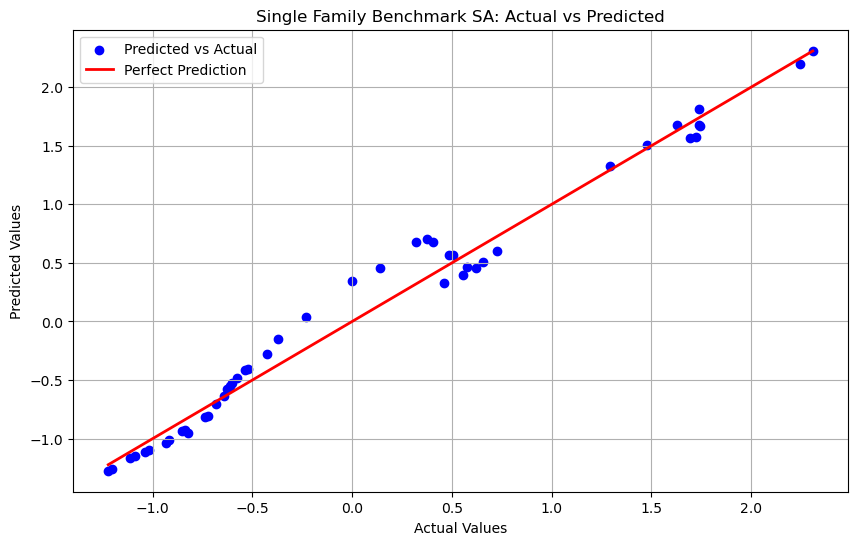

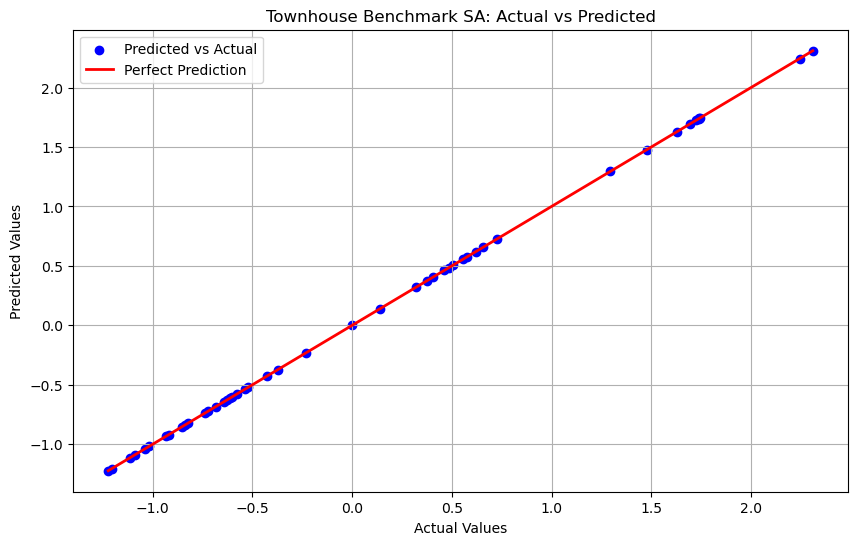

In [4]:
import matplotlib.pyplot as plt

# Function to visualize predictions vs actual values
def plot_predictions(y_test, y_pred, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Perfect Prediction')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Predictions for 'Single_Family_Benchmark_SA'
X = df.drop(columns=['Single_Family_Benchmark_SA', 'Townhouse_Benchmark_SA', 'Date'])
y = df['Single_Family_Benchmark_SA']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_single_family = LinearRegression()
model_single_family.fit(X_train, y_train)
y_pred_single_family = model_single_family.predict(X_test)

# Predictions for 'Townhouse_Benchmark_SA'
X = df.drop(columns=['Single_Family_Benchmark_SA', 'Townhouse_Benchmark_SA', 'Date'])
y = df['Townhouse_Benchmark_SA']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_townhouse = LinearRegression()
model_townhouse.fit(X_train, y_train)
y_pred_townhouse = model_townhouse.predict(X_test)

# Plotting
plot_predictions(y_test, y_pred_single_family, 'Single Family Benchmark SA: Actual vs Predicted')
plot_predictions(y_test, y_pred_townhouse, 'Townhouse Benchmark SA: Actual vs Predicted')


**Here are the visualizations for the predictions:**

1. **Single Family Benchmark SA: Actual vs Predicted** - The scatter plot shows the predicted values versus the actual values. The red line represents a perfect prediction. The closer the points are to this line, the better the model's predictions.

2. **Townhouse Benchmark SA: Actual vs Predicted** - Similarly, this plot shows how well the model predicts the townhouse benchmark values compared to the actual values.

Both plots demonstrate that the predictions are extremely close to the actual values, indicating a very high level of accuracy in the linear regression models.

**Selected Features:**
- Interest Rate
- Unemployment Rate
- Immigration Num
- Active Businesses
- Opening Businesses
- Closing Businesses
- All-items CPI
- All industries GDP

In [6]:
# Selecting the external features for prediction
external_features = [
    'Interest Rate', 'Unemployment Rate', 'Immigration Num', 
    'Active businesses', 'Opening businesses', 'Closing businesses', 
    'All-items CPI', 'All industries GDP'
]

# Function to build and evaluate a model using only the selected external features
def build_and_evaluate_external_model(target_variable):
    X = df[external_features]
    y = df[target_variable]

    # Splitting the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Building the Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Making predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluating the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return mse, r2, model, y_test, y_pred

# Evaluating models for 'Single_Family_Benchmark_SA' and 'Townhouse_Benchmark_SA'
mse_single_family_ext, r2_single_family_ext, model_single_family_ext, y_test_single_family_ext, y_pred_single_family_ext = build_and_evaluate_external_model('Single_Family_Benchmark_SA')
mse_townhouse_ext, r2_townhouse_ext, model_townhouse_ext, y_test_townhouse_ext, y_pred_townhouse_ext = build_and_evaluate_external_model('Townhouse_Benchmark_SA')

mse_single_family_ext, r2_single_family_ext, mse_townhouse_ext, r2_townhouse_ext


(0.06349533540899906,
 0.9411860323606507,
 0.06701187782090456,
 0.9370636526831587)

**Single Family Benchmark SA:**
- **Mean Squared Error (MSE):** 0.0635

- **R-squared (R²):** 0.9412 (Indicates that about 94.12% of the variance in the target variable is explained by the model.)

**Townhouse Benchmark SA:**

- **Mean Squared Error (MSE):** 0.0670
- **R-squared (R²):** 0.9371 (Indicates that about 93.71% of the variance in the target variable is explained by the model.)

These results suggest that the external features provide a strong predictive capability for house prices, though not as perfect as using direct housing-related features. The models still perform well, explaining the majority of the variance in the benchmarks.

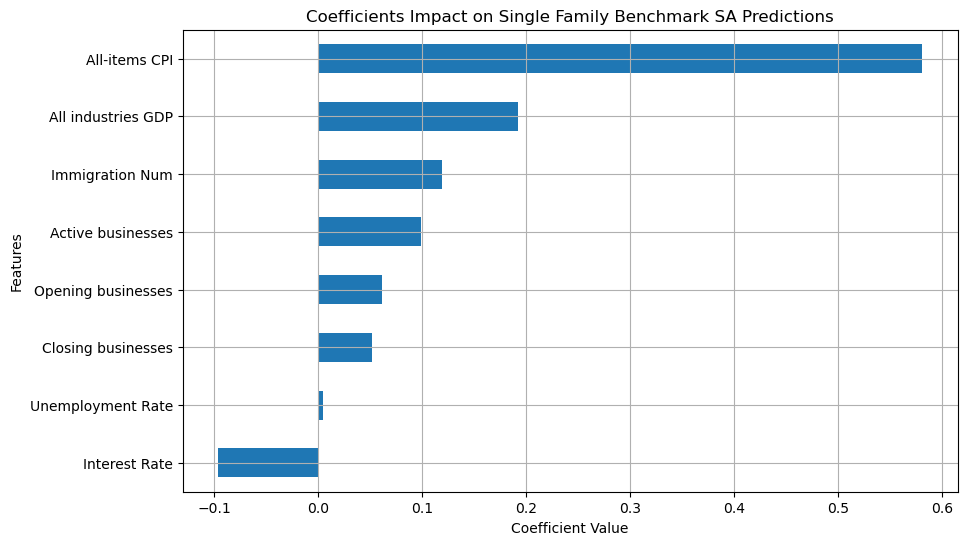

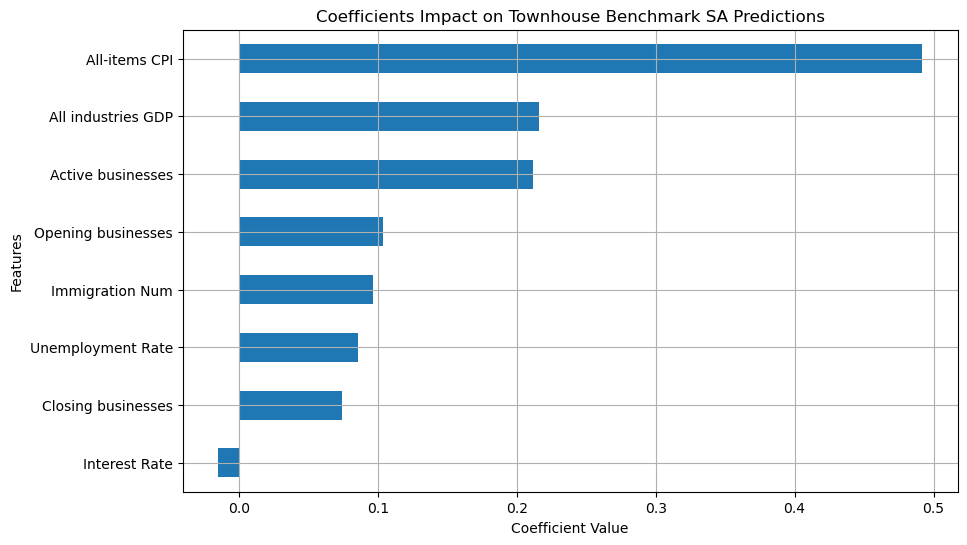

In [7]:
# Visualizing the coefficients for the models using external features

# Function to visualize model coefficients
def plot_coefficients(model, feature_names, title):
    coefficients = pd.Series(model.coef_, index=feature_names)
    coefficients = coefficients.sort_values()
    
    plt.figure(figsize=(10, 6))
    coefficients.plot(kind='barh')
    plt.title(title)
    plt.xlabel('Coefficient Value')
    plt.ylabel('Features')
    plt.grid(True)
    plt.show()

# Plotting coefficients for 'Single_Family_Benchmark_SA'
plot_coefficients(model_single_family_ext, external_features, 'Coefficients Impact on Single Family Benchmark SA Predictions')

# Plotting coefficients for 'Townhouse_Benchmark_SA'
plot_coefficients(model_townhouse_ext, external_features, 'Coefficients Impact on Townhouse Benchmark SA Predictions')


The visualizations show the impact of each external feature's coefficient on the predictions for both the **Single_Family_Benchmark_SA and Townhouse_Benchmark_SA:**

1. **Single Family Benchmark SA:**
    - The coefficients indicate how much each feature contributes to the prediction. Features like ***All-items CPI*** and ***Interest Rate*** have significant impacts, with positive or negative influences depending on their direction.

2. **Townhouse Benchmark SA:**
    - Similar to the Single Family model, the ***Interest Rate*** and ***All-items CPI*** again play crucial roles, among other features.